In [12]:
import pandas as pd
from helpermodules import memory_handling as mh
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from functions import compute_sentiment, filtering_df, retrieve_datas, scraping_speeches, update_realtime, analysis
from functions.update_realtime import change_time
from functions.filtering_df import main as filtering
from functions.analysis import main as plot
from functions.scraping_speeches import main as scraping

#######
'''questa prima parte del codice presenta il codice che dovrebbe essere implementato 
(quello preceduto da '#') e in seguito il codice che ho utlizzato io non avendo ancora 
accesso alle funzioni, riciclando i file csv e 'pulendoli' per la task.
Le funzioni che verranno implementate devono restituire un oggetto che abbia 
la stessa forma e caratteristiche dell'oggetto finale (evidenziato nel codice)'''

yearlist = [2020,2021,2022,2023,2024]
# df_fed = scraping(yearlist) -> ALREADY RUN, STORE IN ANOTHER FILE
file = "2020-2024fedspeeches.pkl"
helper = mh.PickleHelper.pickle_load(file)
df_fed = helper.obj
df_fed['speaker'] = df_fed['speaker'].str.replace('Speech - ', '', regex=False)
df_fed['speaker'] = df_fed['speaker'].str.replace('Discussion - ', '', regex=False)


#df_prices = retrieve_datas(df_speech, deltabefore, deltaafter) -> ALREADY RUN
file2 = "2020-2024prices.pkl"
helper = mh.PickleHelper.pickle_load(file2)
df = helper.obj
print(df.columns) 
df['date'] = df['datetime'].dt.date
df_prices = df



#df_speech = computespeech()
file3 = "2020-2024speeches.pkl"
helper = mh.PickleHelper.pickle_load(file3)
df_speech = helper.obj
df_speech = df_speech[df_speech['date']>='2020-01-01']
df_speech = df_speech.sort_values(['date','timestamp'], ascending=True) #<--- OGGETTO FINALE


#df_sentiment = compute_sentiment()
file4 = "2020-2024sentiment.pkl"
helper = mh.PickleHelper.pickle_load(file4)
df_sentiment = helper.obj 


############

df_fed.rename(columns={'timestamp': 'opening_time'}, inplace=True)
#update the correct timestamp for df_speech
df_speech_final = change_time(df_speech, df_fed) #drop rate 16% e 58
#sorting the values
df_speech_final = df_speech_final.sort_values(['date','timestamp'], ascending=True)



# Define market open and close times (in ET)
market_open = pd.to_datetime('09:30:00', format='%H:%M:%S').time()
market_close = pd.to_datetime('16:00:00', format='%H:%M:%S').time()

# Extract time from 'timestamp'
df_speech_final['time'] = df_speech_final['timestamp'].dt.time

# Filter rows where 'time' is within market hours
beforefilteringvalues = len(df_speech_final.text.unique())
df_filtered = df_speech_final[(df_speech_final['time'] >= market_open) & (df_speech_final['time'] < market_close)]
afterfilteringvalues = len(df_filtered.text.unique())
print('When filtering out datas out of market time the drop ratio is ',(afterfilteringvalues/beforefilteringvalues)*100,'%\nWe have dropped ',beforefilteringvalues-afterfilteringvalues,'values') # 65% e 100 valori
df_speech_final = df_filtered.drop(columns=['time'])



df_speech=df_speech_final

Index(['datetime', 'close', 'volume'], dtype='object')
When comparing df_speech with df_fed the drop ratio is 16.15598885793872 % 
We have dropped  58 values
When filtering out datas out of market time the drop ratio is  66.44518272425249 %
We have dropped  101 values


the number of elements less than 5 mins long are 19
No price data found for speech: Strengthening the Community Reinvestment Act by Staying True to Its Core Purpose by Governor Lael Brainard on 2020-01-08 00:00:00
No price data found for speech: The Outlook for Housing by Governor Michelle W. Bowman on 2020-01-16 00:00:00
No price data found for speech: Financial Markets and Monetary Policy: Is There a Hall of Mirrors Problem? by Vice Chair Richard H. Clarida on 2020-02-21 00:00:00
No price data found for speech: Monetary Policy Strategies and Tools When Inflation and Interest Rates Are Low by Governor Lael Brainard on 2020-02-21 00:00:00
No price data found for speech: U.S. Economic Outlook and Monetary Policy by Vice Chair Richard H. Clarida on 2020-02-25 00:00:00
No price data found for speech: New Economic Challenges and the Fed's Monetary Policy Review by Chair Jerome H. Powell on 2020-08-27 00:00:00
No price data found for speech: Remarks at the Hoover Institution by Vice Chair f

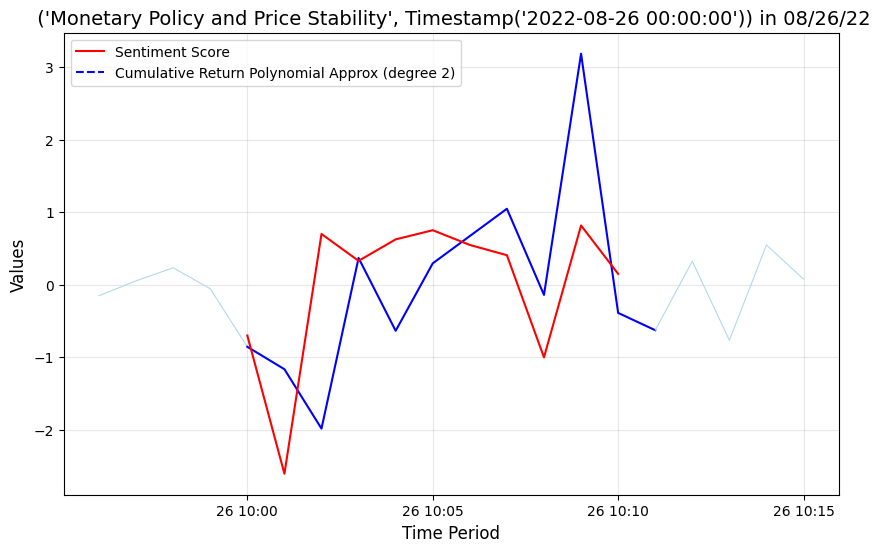

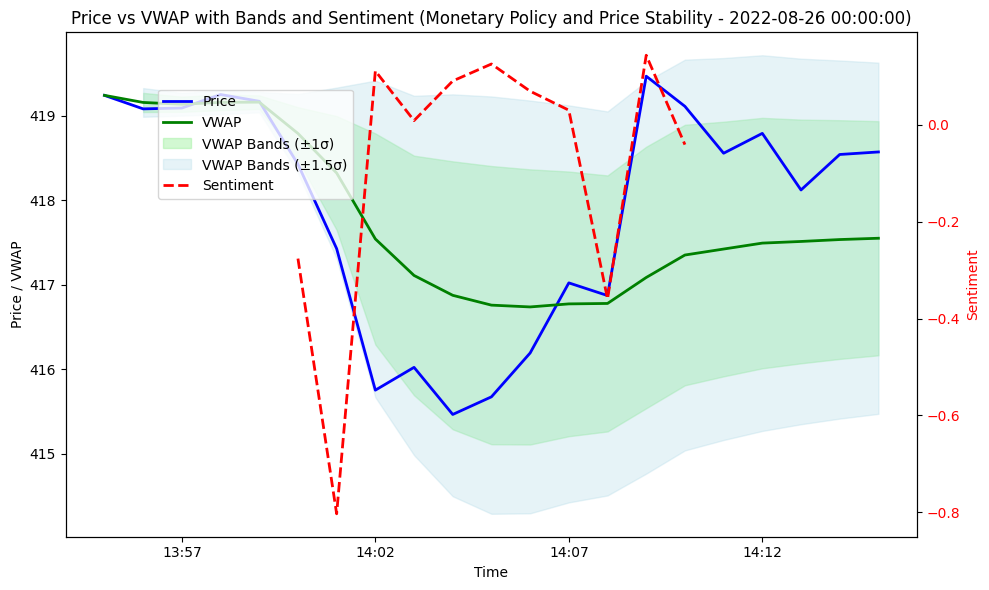

Thank you for t 





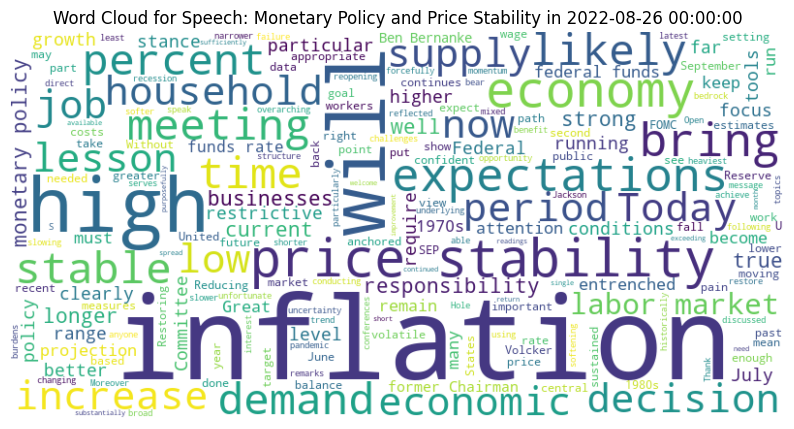

In [13]:
#combining together all the values to have a final dataframe including datas for 
#speech, sentiment, pct_change
#select a timedelta to also show prior and successive pct_change values 
deltabefore = 5
deltaafter = 4
df_speech_final, df_prices_final = filtering(df_prices, df_speech, df_sentiment,deltabefore, deltaafter) # dropped 51 values 

#plot the best top_n values for volatility over the speech time 
plot(df_speech_final, deltabefore, deltaafter, top_n=1)


In [14]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [15]:
import seaborn as sns
def density_distribution (df, info=None):
    df = df.dropna()
    sentiment_score=df.finbert_score
    sns.histplot(sentiment_score, kde=True, bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of Sentiment Scores for {info}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Density')
    plt.show()

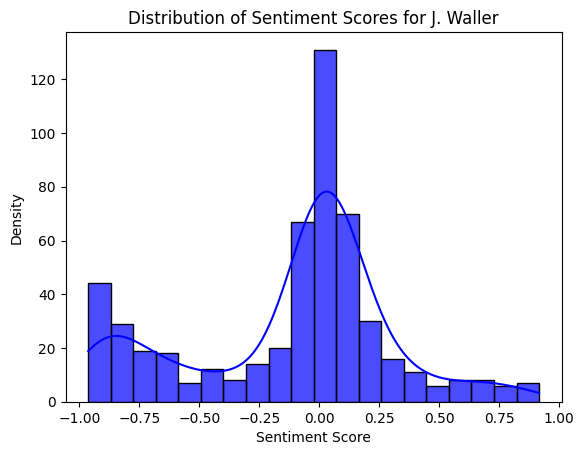

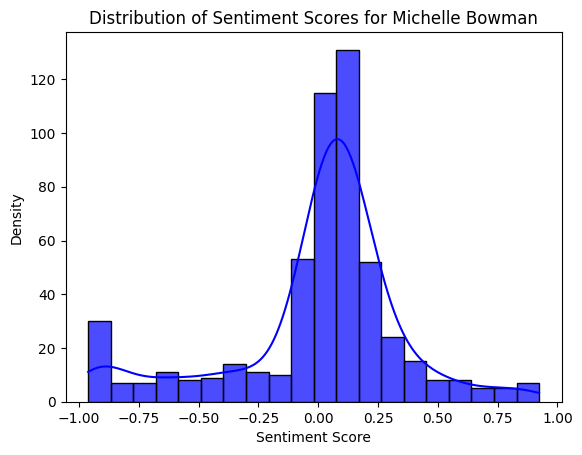

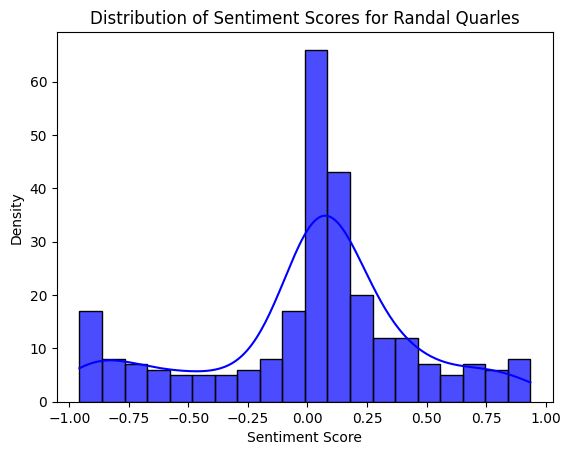

In [16]:
dfwaller = df_speech_final[df_speech_final['speaker']=='Governor Christopher J. Waller']
density_distribution(dfwaller , 'J. Waller')
dfbowman = df_speech_final[df_speech_final['speaker']=='Governor Michelle W. Bowman']
density_distribution(dfbowman, 'Michelle Bowman')
dfquarles = df_speech_final[df_speech_final['speaker']=='Vice Chair for Supervision Randal K. Quarles']
density_distribution(dfquarles , 'Randal Quarles')


In [17]:
# 2020
df2020 = df_speech_final[(df_speech_final['date'] >= '2020-01-01') & (df_speech_final['date'] <= '2020-12-31')]

# 2021
df2021 = df_speech_final[(df_speech_final['date'] >= '2021-01-01') & (df_speech_final['date'] <= '2021-12-31')]

# 2022
df2022 = df_speech_final[(df_speech_final['date'] >= '2022-01-01') & (df_speech_final['date'] <= '2022-12-31')]

# 2023
df2023 = df_speech_final[(df_speech_final['date'] >= '2023-01-01') & (df_speech_final['date'] <= '2023-12-31')]

# 2024
df2024 = df_speech_final[(df_speech_final['date'] >= '2024-01-01') & (df_speech_final['date'] <= '2024-12-31')]


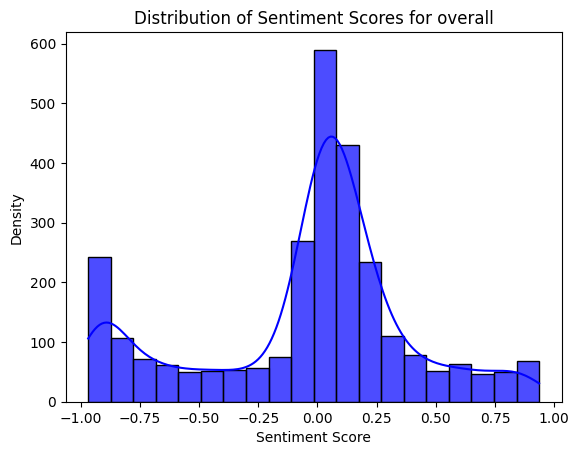

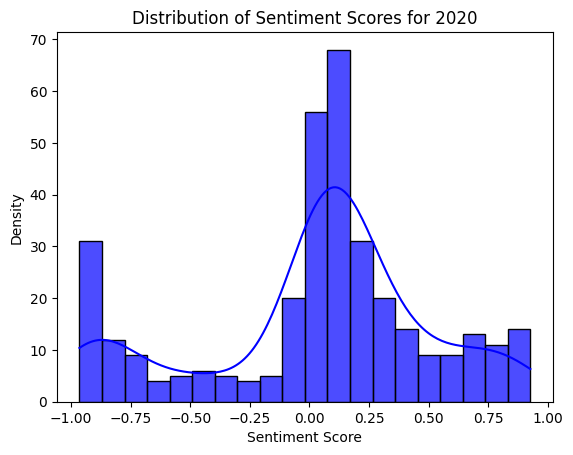

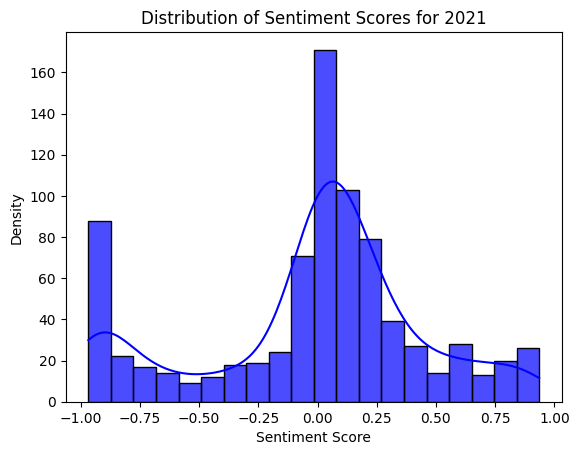

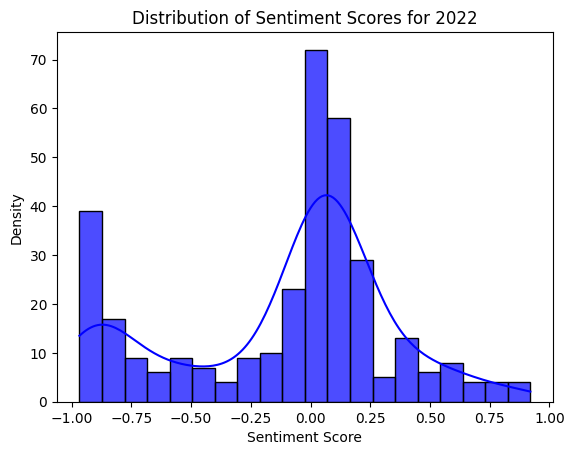

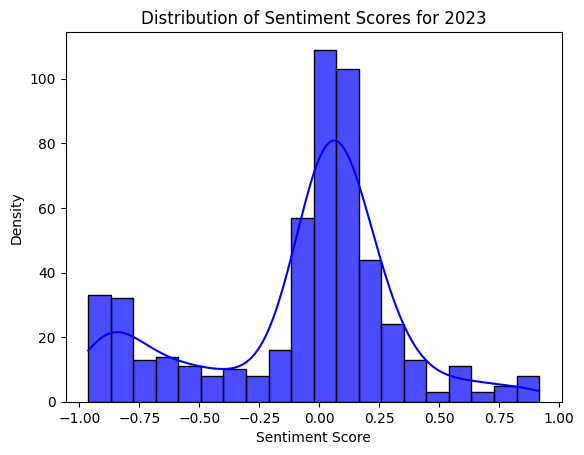

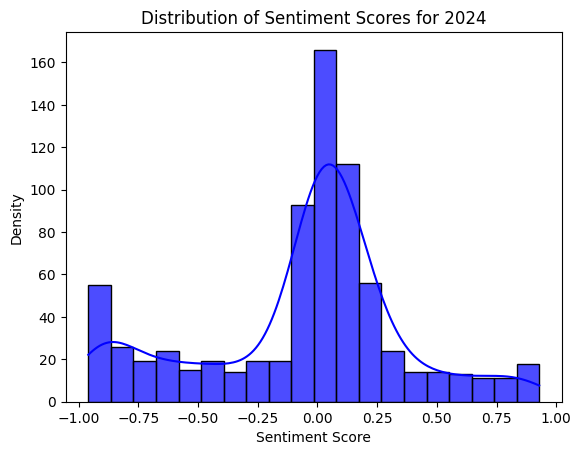

In [19]:
density_distribution(df_speech_final , 'overall')
density_distribution(df2020 , '2020')
density_distribution(df2021 , '2021')
density_distribution(df2022 , '2022')
density_distribution(df2023 , '2023')
density_distribution(df2024 , '2024')